In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/L5'

/content/drive/MyDrive/L5


In [ ]:
%ls

'Cher Eng Lim - pic1.jpg'  'Cher Eng Lim - test_image.jpeg'


In [ ]:
#%cd '/content/drive/MyDrive/SDAIE/Deep Learning - October 2021/03_Coding Assignments/Week05_Load VGG16/'
#%ls

/content/drive/MyDrive/SDAIE/Deep Learning - October 2021/03_Coding Assignments/Week05_Load VGG16
Load_VGG16_and_test.ipynb  Load_VGG16_and_test_SOLUTION.ipynb  test_image.jpeg


#Import nessessary libraries

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.vgg16 import VGG16

#How many models are available?

Go to this link: https://www.tensorflow.org/api_docs/python/tf/keras/applications

#VGG16 pre-trained network

Refer to this link [link](https://keras.io/api/applications/vgg/#vgg16-function). When loading VGG16, you can just ignore all parameters except setting `weights = 'imagenet'`.

`tf.keras.applications.VGG16(`
    `include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",)`


In [ ]:
# Initialize the model with pre-trained weights
model = VGG16()

Use `....summary()` and `....layers` to anwer the following questions:


In [ ]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
len(model.layers)

23

###Q1: How many trainable parameters are there?
Ans: <font color='red'>138357544</font>

###Q2: How many layers are there? 
Ans: <font color='red'>23</font>

###Q3: What is the size of `InputLayer`? 
Ans: <font color='red'>224, 224, 3</font>

###Q4: What information does the last number of the answer of Q3 tell you? 
Ans: <font color='red'>image dimension: 224x224x3 (w, h, colors) </font>

In [ ]:
# Your code
len(model.layers)

23

Get the number of layers in the network!

In [ ]:
# Your code
print('Number of layers = ', len(model.layers))

Number of layers =  23


#Load an image and test

##Show and inspect the image

Display the image using `matplotlib`.
Link for reference is [here](https://matplotlib.org/stable/tutorials/introductory/images.html?highlight=image%20tutorial).

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

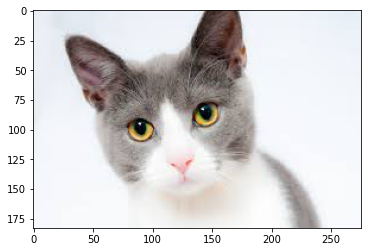

In [ ]:
# NOTE: make sure you use the correct image name!!!
# The image in your Google Drive might have a different name!!!
img = mpimg.imread('Cher Eng Lim - test_image.jpeg') 

imgplot = plt.imshow(img)
plt.show()

Use `....shape` to print out the shape of `img`.

In [ ]:
# Your code
img.shape

(183, 276, 3)

You will see that the size of the image is not suitable for VGG16. Therefore, we need to resize it.

##Load the image and resize it

We will use functions available [here](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image). The library was loaded at the top of the notebook:

`from tensorflow.keras.preprocessing import image`

Use [`image.load_img()`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/load_img) to load and resize the image. Then convert it to an array ([link](https://www.tensorflow.org/api_docs/python/tf/keras/utils/img_to_array)) and print the size of the result.

In [ ]:
img = image.load_img('Cher Eng Lim - test_image.jpeg', target_size = (224, 224))
array_img = image.img_to_array(img)
print(array_img.shape)

(224, 224, 3)


If you look carefully at `InputLayer` of VGG16, you would have seen this:

`(None, 224, 224, 3)`.

So, we need to expand the dimension of `array_img`. The function to be used is from NumPy ([link](https://numpy.org/doc/stable/reference/generated/numpy.expand_dims.html)).Play with `axis` parameter below to get the required size.

In [ ]:
array_img_expanded = np.expand_dims(array_img, axis=0)
print(array_img_expanded.shape)

(1, 224, 224, 3)


##Use VGG16 to predict the image

Use `vgg16.predict()` to get the prediction from `vgg16`.

In [ ]:
predictions = model.predict(array_img_expanded)

Let's print out the size of `predictions`. You would obtain: `Size of predictions =  (1, 1000)`.

In [ ]:
print("Size of predictions = ", predictions.shape)

Size of predictions =  (1, 1000)


Q4: Why do you see number $1000$? Ans: <font color='red'>Shows the probabilities of 1000 predicted outcomes</font>



Print the first $10$ values of `predictions`:

In [ ]:
#Your code:
predictions[0, 0:10]

array([1.4934457e-08, 1.0355412e-07, 4.3224018e-06, 1.2787180e-05,
       3.7336199e-06, 1.6850873e-06, 1.7325595e-08, 1.5385879e-07,
       3.9996497e-08, 6.0192034e-09], dtype=float32)

Use [`decode_predictions()`](https://www.tensorflow.org/api_docs/python/tf/keras/applications/imagenet_utils/decode_predictions) to have top $10$ prediction results

In [ ]:
#Your code:
decoded_predictions = decode_predictions(predictions, top=10) 

49152/35363 [=========================================] - 0s 0us/step


Decode the predictions

In [ ]:
print(str(decoded_predictions))

[[('n02124075', 'Egyptian_cat', 0.8915444), ('n02123597', 'Siamese_cat', 0.030444106), ('n02123045', 'tabby', 0.025319066), ('n02127052', 'lynx', 0.015153145), ('n02096585', 'Boston_bull', 0.006679677), ('n02123159', 'tiger_cat', 0.0063001), ('n02110806', 'basenji', 0.0023732935), ('n02091244', 'Ibizan_hound', 0.0014941305), ('n03887697', 'paper_towel', 0.0013989992), ('n04522168', 'vase', 0.0012243645)]]


###Q5: VGG16 predicts the image to be <font color='red'>Egyptian cat</font>.